#**Classificação: Resolvendo problemas multiclasse**

##**Aula 1 - Conhecendo os dados**

###**Carregando os dados**

In [62]:
import pandas as pd

In [63]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/classificacao_multiclasse/main/Dados/dados_estudantes.csv')

In [64]:
df.head()

,Estado civil,Migração,Sexo,Idade na matrícula,Estrangeiro,Necessidades educacionais especiais,Devedor,Taxas de matrícula em dia,Bolsista,Taxa de desemprego,...,disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),disciplinas 2º semestre (creditadas),disciplinas 2º semestre (matriculadas),disciplinas 2º semestre (avaliações),disciplinas 2º semestre (aprovadas),disciplinas 2º semestre (notas),disciplinas 2º semestre (sem avaliações),Target
0,Solteiro,Sim,Masculino,20,Não,Não,Não,Sim,Não,10.8,...,0,0.000000,0,0,0,0,0,0.000000,0,Desistente
1,Solteiro,Sim,Masculino,19,Não,Não,Não,Não,Não,13.9,...,6,14.000000,0,0,6,6,6,13.666667,0,Graduado
2,Solteiro,Sim,Masculino,19,Não,Não,Não,Não,Não,10.8,...,0,0.000000,0,0,6,0,0,0.000000,0,Desistente
3,Solteiro,Sim,Feminino,20,Não,Não,Não,Sim,Não,9.4,...,6,13.428571,0,0,6,10,5,12.400000,0,Graduado
4,Casado,Não,Feminino,45,Não,Não,Não,Sim,Não,13.9,...,5,12.333333,0,0,6,6,6,13.000000,0,Graduado


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Estado civil                              4424 non-null   object 
 1   Migração                                  4424 non-null   object 
 2   Sexo                                      4424 non-null   object 
 3   Idade na matrícula                        4424 non-null   int64  
 4   Estrangeiro                               4424 non-null   object 
 5   Necessidades educacionais especiais       4424 non-null   object 
 6   Devedor                                   4424 non-null   object 
 7   Taxas de matrícula em dia                 4424 non-null   object 
 8   Bolsista                                  4424 non-null   object 
 9   Taxa de desemprego                        4424 non-null   float64
 10  Taxa de inflação                    

###**Entendendo os dados**

In [66]:
df['Target'].unique()

array(['Desistente', 'Graduado', 'Matriculado'], dtype=object)

##**Aula 2 - Explorando os dados**

###**Dados demográficos**

* Estado civil
* Migração
* Sexo
* Idade na inscrição
* Estrangeiro

In [67]:
df['Estado civil'].value_counts(normalize = True)*100

Estado civil
Solteiro               88.584991
Casado                  8.566908
Divorciado              2.056962
União Estável           0.565099
Legalmente Separado     0.135624
Viúvo                   0.090416
Name: proportion, dtype: float64

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

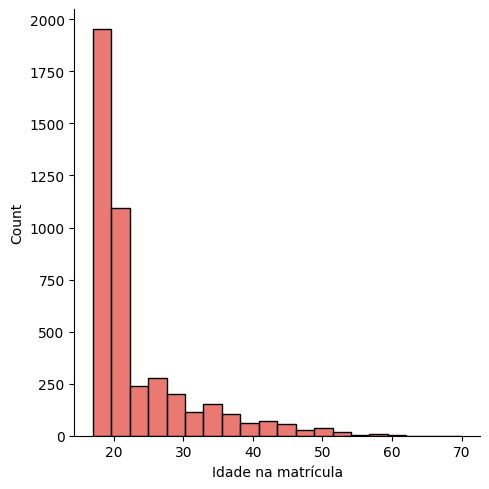

In [69]:
sns.displot(df['Idade na matrícula'], bins=20)
plt.show()

In [70]:
color_dict = {'Desistente': '#e34c42','Graduado': '#4dc471', 'Matriculado': '#3b71db'}

# Definindo a paleta de cores
sns.set_palette(list(color_dict.values()))

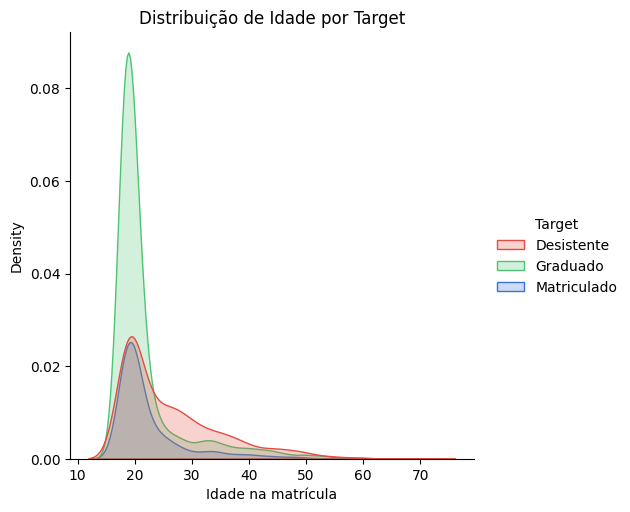

In [71]:
sns.displot(data=df, x='Idade na matrícula', hue='Target', kind='kde', fill=True)
plt.title('Distribuição de Idade por Target')
plt.show()

In [72]:
df['Estrangeiro'].value_counts(normalize = True)*100

Estrangeiro
Não    97.513562
Sim     2.486438
Name: proportion, dtype: float64

In [73]:
df['Sexo'].value_counts(normalize = True)*100

Sexo
Feminino     64.82821
Masculino    35.17179
Name: proportion, dtype: float64

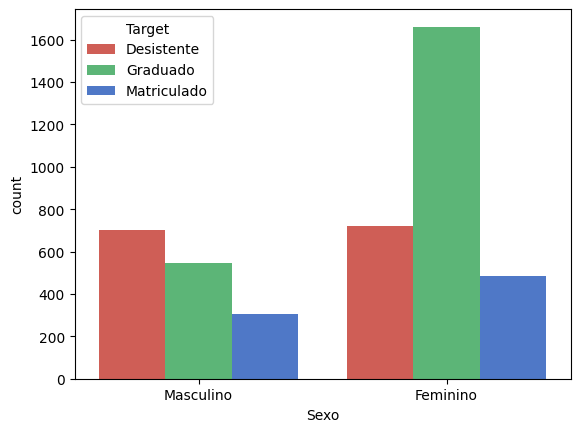

In [74]:
sns.countplot(x='Sexo', hue='Target', data=df)
plt.show()

###**Dados socioeconômicos e macroeconômicos**

**Socioeconômicos**
* Necessidades educacionais especiais
* Devedor
* Taxas de matrícula em dia
* Bolsista

**Macroeconômicos**
* Taxa de desemprego
* Taxa de inflação
* PIB

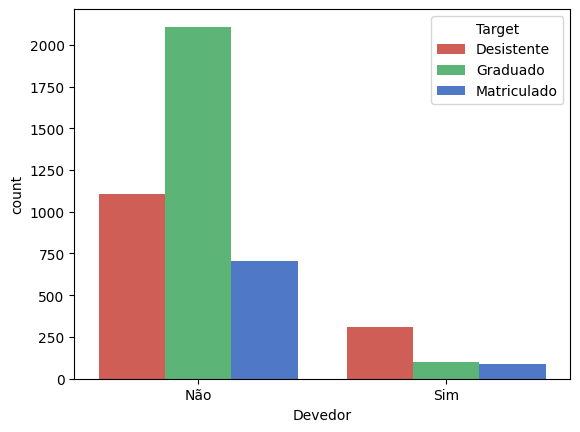

In [75]:
sns.countplot(x='Devedor', hue='Target', data=df)
plt.show()

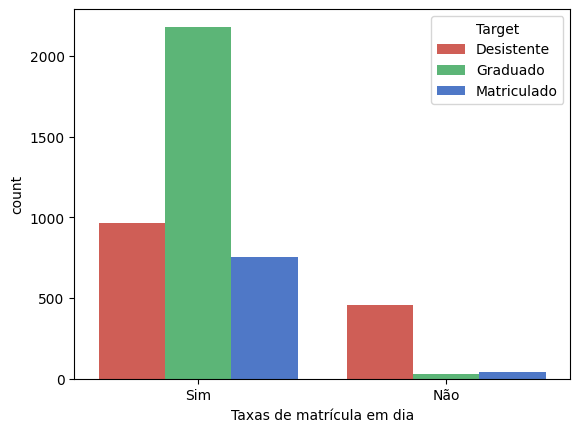

In [76]:
sns.countplot(x='Taxas de matrícula em dia', hue='Target', data=df)
plt.show()

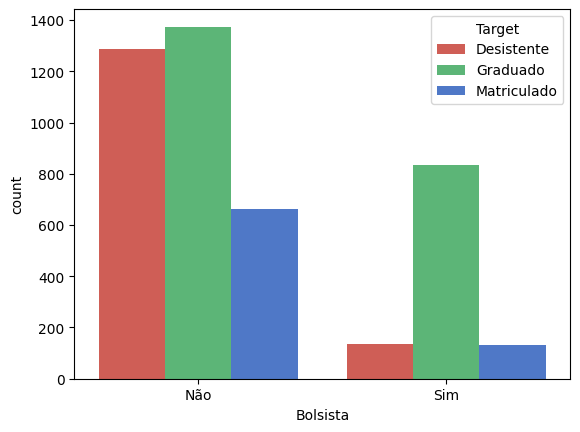

In [77]:
sns.countplot(x='Bolsista', hue='Target', data=df)
plt.show()

###**Dados no momento da matrícula**

* Curso
* Período
* Qualificação prévia

In [78]:
import plotly.express as px
import nbformat

In [79]:
# !pip install nbformat 

In [80]:
# Calcula as contagens das combinações Curso-Target
contagem = df.groupby(["Curso", "Target"]).size().reset_index(name="Contagem")

# Calcula as porcentagens
contagem['Porcentagem'] = contagem.groupby("Curso")["Contagem"].transform(lambda x: (x / x.sum()) * 100)

# Cria o gráfico interativo
fig = px.bar(contagem, y='Curso', x='Porcentagem', color='Target', orientation='h',
             color_discrete_map={'Desistente': '#e34c42', 'Graduado': '#4dc471', 'Matriculado': '#3b71db'})

# Mostra o gráfico
fig.show()

###**Dados acadêmicos**

* disciplinas creditadas
* disciplinas matriculadas
* disciplinas avaliações
* disciplinas aprovadas
* disciplinas notas
* disciplinas sem avaliações
* disciplinas faltas

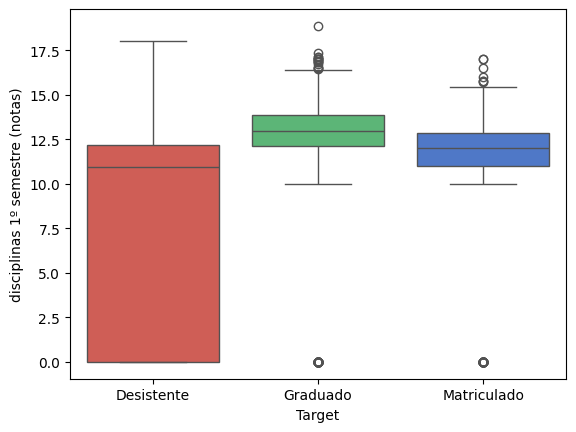

In [81]:
sns.boxplot(x='Target', y='disciplinas 1º semestre (notas)', hue='Target', data=df)
plt.show()

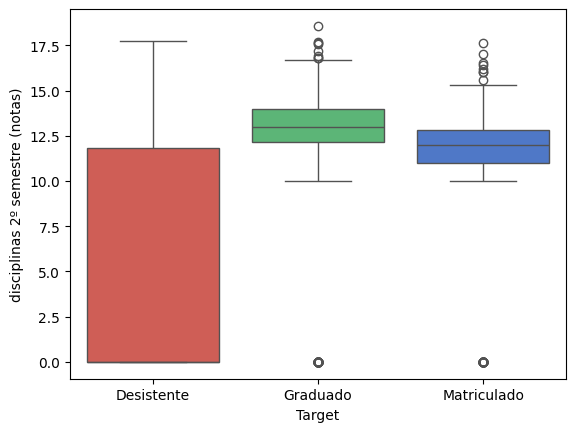

In [82]:
sns.boxplot(x='Target', y='disciplinas 2º semestre (notas)',hue='Target', data=df)
plt.show()

In [83]:
df['Target'].value_counts(normalize = True)*100

Target
Graduado       49.932188
Desistente     32.120253
Matriculado    17.947559
Name: proportion, dtype: float64

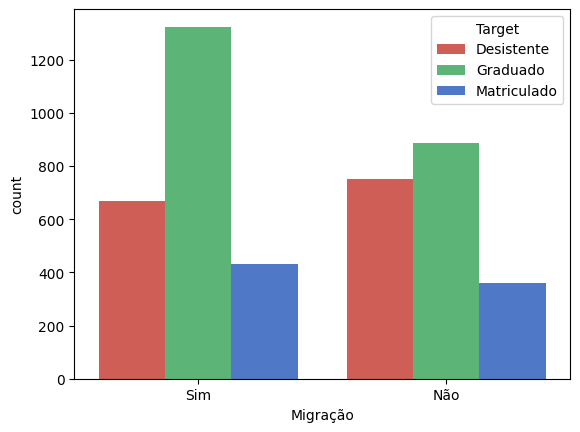

In [84]:
sns.countplot(x='Migração', hue='Target', data=df)
plt.show()

In [85]:
df['Necessidades educacionais especiais'].value_counts(normalize=True)*100

Necessidades educacionais especiais
Não    98.847197
Sim     1.152803
Name: proportion, dtype: float64

In [86]:
df.groupby('Target')['Necessidades educacionais especiais'].value_counts(normalize=True)*100

Target       Necessidades educacionais especiais
Desistente   Não                                    98.803659
             Sim                                     1.196341
Graduado     Não                                    98.958805
             Sim                                     1.041195
Matriculado  Não                                    98.614610
             Sim                                     1.385390
Name: proportion, dtype: float64

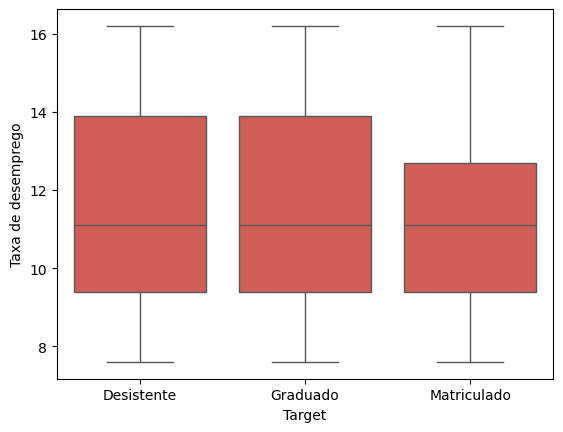

In [87]:
sns.boxplot(x='Target', y='Taxa de desemprego', data=df)
plt.show()

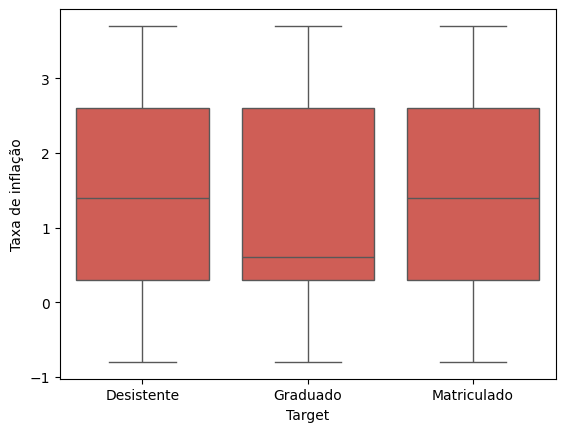

In [88]:
sns.boxplot(x='Target', y='Taxa de inflação', data=df)
plt.show()

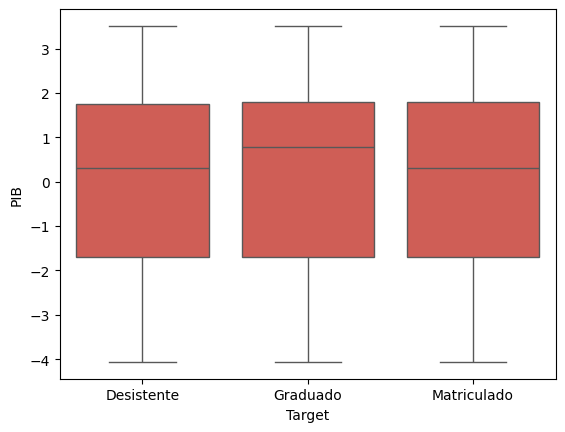

In [89]:
sns.boxplot(x='Target', y='PIB', data=df)
plt.show()

In [90]:
df.groupby('Target')['Qualificação prévia'].value_counts(normalize=True)*100

Target       Qualificação prévia                                     
Desistente   Educação secundária                                         75.862069
             Educação básica 3º ciclo (9º/10º/11º ano) ou equivalente     7.318790
             Educação superior - licenciatura                             5.277973
             Curso de especialização tecnológica                          4.855735
             Outro - 11º ano de escolaridade                              1.829697
             Educação superior - bacharelado                              1.125968
             Educação superior - licenciatura (1º ciclo)                  0.985222
             12º ano de escolaridade - não concluído                      0.774103
             Frequência de educação superior                              0.492611
             Curso técnico superior profissional                          0.422238
             Educação superior - mestrado                                 0.281492
             11º 

##**Aula 3 - Realizando o treinamento**

###**Preparando os dados**

In [91]:
from sklearn.preprocessing import OneHotEncoder

colunas_categoricas = ['Migração', 'Sexo','Estrangeiro', 'Necessidades educacionais especiais', 'Devedor',
                     'Taxas de matrícula em dia', 'Bolsista', 'Período','Estado civil', 'Curso', 'Qualificação prévia']

# Selecionando apenas as colunas categóricas do dataframe
df_categorico = df[colunas_categoricas]

# Inicializando o OneHotEncoder
encoder = OneHotEncoder(drop='if_binary')

# Ajustando e transformando os dados, criando um novo dataframe com as colunas codificadas
df_encoded = pd.DataFrame(encoder.fit_transform(df_categorico).toarray(),
                          columns=encoder.get_feature_names_out(colunas_categoricas))

# Combinando as colunas codificadas com as colunas não codificadas do dataframe original
df_final = pd.concat([df.drop(colunas_categoricas, axis=1), df_encoded], axis=1)


In [92]:
df_final.head()

,Idade na matrícula,Taxa de desemprego,Taxa de inflação,PIB,disciplinas 1º semestre (creditadas),disciplinas 1º semestre (matriculadas),disciplinas 1º semestre (avaliações),disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),...,Qualificação prévia_Educação básica 3º ciclo (9º/10º/11º ano) ou equivalente,Qualificação prévia_Educação secundária,Qualificação prévia_Educação superior - bacharelado,Qualificação prévia_Educação superior - doutorado,Qualificação prévia_Educação superior - licenciatura,Qualificação prévia_Educação superior - licenciatura (1º ciclo),Qualificação prévia_Educação superior - mestrado,Qualificação prévia_Educação superior - mestrado (2º ciclo),Qualificação prévia_Frequência de educação superior,Qualificação prévia_Outro - 11º ano de escolaridade
0,20,10.8,1.4,1.74,0,0,0,0,0.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19,13.9,-0.3,0.79,0,6,6,6,14.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19,10.8,1.4,1.74,0,6,0,0,0.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20,9.4,-0.8,-3.12,0,6,8,6,13.428571,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,45,13.9,-0.3,0.79,0,6,9,5,12.333333,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###**Separando os dados**

In [93]:
X = df_final.drop('Target', axis=1)
y = df_final['Target']

In [94]:
from sklearn.model_selection import train_test_split

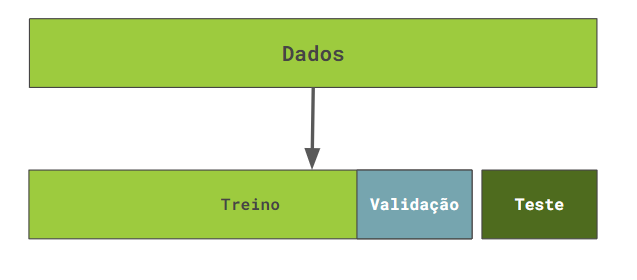

In [95]:
X, X_teste, y, y_teste = train_test_split(X, y, test_size=0.30, stratify=y, random_state=0)
X_treino, X_val, y_treino, y_val = train_test_split(X, y, stratify=y, random_state=0)

###**Treinando o modelo com Random Forest Classifier**

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [98]:
modelo_rf = RandomForestClassifier(random_state=0)
modelo_rf.fit(X_treino, y_treino)
y_pred = modelo_rf.predict(X_val)
print(f'Acurácia de treino: {modelo_rf.score(X_treino, y_treino)}')
print(f'Acurácia de validação: {modelo_rf.score(X_val, y_val)}')

Acurácia de treino: 0.9969853574504737
Acurácia de validação: 0.7751937984496124


In [99]:
matriz_confusao = confusion_matrix(y_val, y_pred)
print(matriz_confusao)

[[197  31  21]
 [  8 368  10]
 [ 38  66  35]]


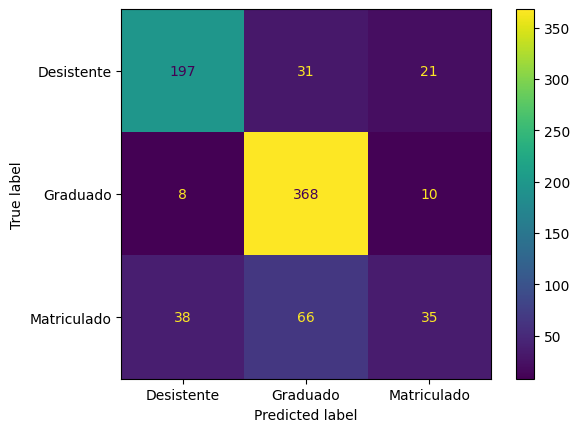

In [100]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, 
                                      display_labels=['Desistente', 'Graduado','Matriculado'])
visualizacao.plot();

In [101]:
from sklearn.ensemble import GradientBoostingClassifier

modelo_gb = GradientBoostingClassifier(random_state=0)
modelo_gb.fit(X_treino, y_treino)
y_pred = modelo_gb.predict(X_val)
print(f'Acurácia de treino: {modelo_gb.score(X_treino, y_treino)}')
print(f'Acurácia de validação: {modelo_gb.score(X_val, y_val)}')

Acurácia de treino: 0.8436692506459949
Acurácia de validação: 0.789405684754522


In [102]:
modelo_rf = RandomForestClassifier(random_state=0, max_depth=10)
modelo_rf.fit(X_treino, y_treino)
y_pred = modelo_rf.predict(X_val)
print(f'Acurácia de treino: {modelo_rf.score(X_treino, y_treino)}')
print(f'Acurácia de validação: {modelo_rf.score(X_val, y_val)}')

Acurácia de treino: 0.9009474590869939
Acurácia de validação: 0.7751937984496124


In [103]:
matriz_confusao = confusion_matrix(y_val, y_pred)
print(matriz_confusao)

[[196  35  18]
 [  7 374   5]
 [ 35  74  30]]


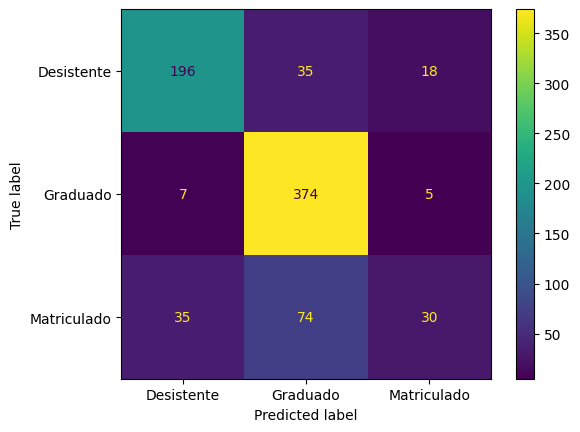

In [104]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, 
                                      display_labels=['Desistente', 'Graduado','Matriculado'])
visualizacao.plot();

In [105]:
from sklearn.ensemble import GradientBoostingClassifier

modelo_gb = GradientBoostingClassifier(random_state=0)
modelo_gb.fit(X_treino, y_treino)
y_pred = modelo_gb.predict(X_val)
print(f'Acurácia de treino: {modelo_gb.score(X_treino, y_treino)}')
print(f'Acurácia de validação: {modelo_gb.score(X_val, y_val)}')

Acurácia de treino: 0.8436692506459949
Acurácia de validação: 0.789405684754522


In [106]:
X = df_final.drop('Target', axis=1)
y = df_final['Target']

In [107]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

mdl_smote = SMOTE(random_state=100)

X_res, y_res = mdl_smote.fit_resample(X,y)

In [108]:
X, X_teste, y, y_teste = train_test_split(X_res, y_res, test_size=0.30, stratify=y_res, random_state=0)
X_treino, X_val, y_treino, y_val = train_test_split(X_res, y_res, stratify=y_res, random_state=0)

In [109]:
modelo_rf = RandomForestClassifier(random_state=0)
modelo_rf.fit(X_treino, y_treino)
y_pred = modelo_rf.predict(X_val)
print(f'Acurácia de treino: {modelo_rf.score(X_treino, y_treino)}')
print(f'Acurácia de validação: {modelo_rf.score(X_val, y_val)}')


Acurácia de treino: 0.9977867203219316
Acurácia de validação: 0.8455039227519614


In [110]:
matriz_confusao = confusion_matrix(y_val, y_pred)
print(matriz_confusao)

[[442  53  58]
 [ 11 494  47]
 [ 34  53 465]]


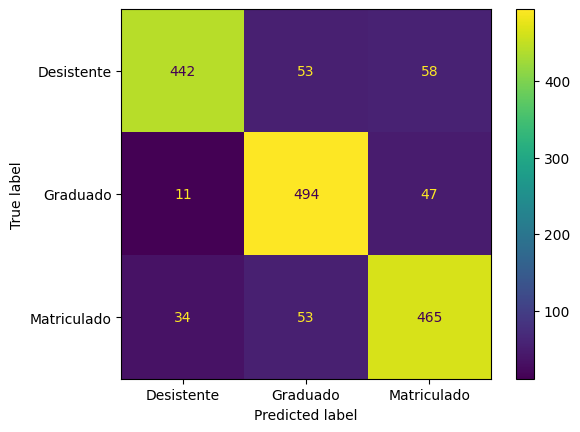

In [111]:

visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, 
                                      display_labels=['Desistente', 'Graduado','Matriculado'])
visualizacao.plot();

In [112]:
from sklearn.ensemble import GradientBoostingClassifier

modelo_gb = GradientBoostingClassifier(random_state=0)
modelo_gb.fit(X_treino, y_treino)
y_pred = modelo_gb.predict(X_val)
print(f'Acurácia de treino: {modelo_gb.score(X_treino, y_treino)}')
print(f'Acurácia de validação: {modelo_gb.score(X_val, y_val)}')

Acurácia de treino: 0.8404426559356137
Acurácia de validação: 0.7954133977066988


In [113]:
modelo_rf = RandomForestClassifier(random_state=0, max_depth=10)
modelo_rf.fit(X_treino, y_treino)
y_pred = modelo_rf.predict(X_val)
print(f'Acurácia de treino: {modelo_rf.score(X_treino, y_treino)}')
print(f'Acurácia de validação: {modelo_rf.score(X_val, y_val)}')

Acurácia de treino: 0.8782696177062375
Acurácia de validação: 0.803862401931201


In [114]:
matriz_confusao = confusion_matrix(y_val, y_pred)
print(matriz_confusao)

[[412  54  87]
 [ 13 474  65]
 [ 40  66 446]]


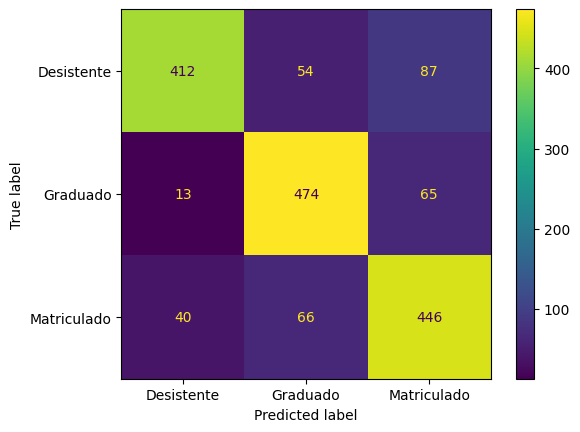

In [115]:

visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, 
                                      display_labels=['Desistente', 'Graduado','Matriculado'])
visualizacao.plot();

In [116]:
from sklearn.ensemble import GradientBoostingClassifier

modelo_gb = GradientBoostingClassifier(random_state=0)
modelo_gb.fit(X_treino, y_treino)
y_pred = modelo_gb.predict(X_val)
print(f'Acurácia de treino: {modelo_gb.score(X_treino, y_treino)}')
print(f'Acurácia de validação: {modelo_gb.score(X_val, y_val)}')

Acurácia de treino: 0.8404426559356137
Acurácia de validação: 0.7954133977066988


In [117]:
matriz_confusao = confusion_matrix(y_val, y_pred)
print(matriz_confusao)

[[413  45  95]
 [ 20 475  57]
 [ 54  68 430]]


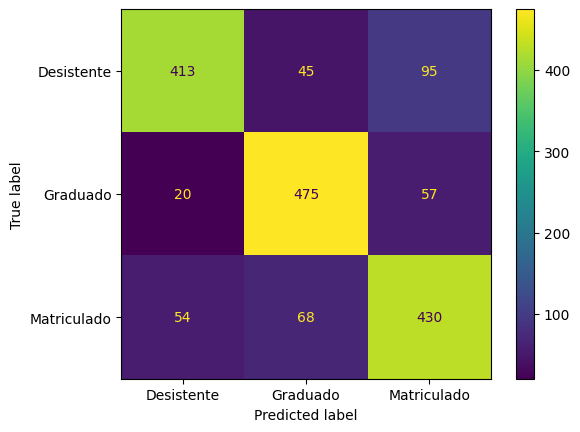

In [118]:

visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, 
                                      display_labels=['Desistente', 'Graduado','Matriculado'])
visualizacao.plot();